In [7]:
import numpy as np

1. 使用割线方法找出以下方程的一个（唯一）根，初始估计为$x_0=1, x_1=2$：
$$
\begin{aligned}
(a) & x^3=2x+2 \\
(b) & e^x+x=7 \\
(c) & e^x+\sin x=4
\end{aligned}
$$

In [8]:
GLOBAL_PRECISION = 8

def SecantLine(func, startEstimation0, startEstimation1, realRoot=None, maxIter=100):
    """
    Usage:
    :param func: The function to be solved.
    :param startEstimation0, startEstimation1: Two start estimations.
    :param maxIter: Maximum of iteration.
    """
    x0 = startEstimation0
    x1 = startEstimation1
    x2 = float('inf')

    tolerance = 10**(-GLOBAL_PRECISION)
    count = 0
    while count < maxIter:
        count += 1
        try:
            x2 = x1 - func(x1)*(x1-x0)/(func(x1)-func(x0))
        except OverflowError:
            print("OverflowError.")
            return None
        except ZeroDivisionError:
            print("ZeroDivisionError.")
            break
        print(f"Iter of {count:2d}, newPoint: {x2}.")
        if abs(x2 - x1) <= tolerance: break
        x0 = x1
        x1 = x2
    print(f"SecantLine method iterated of {count} times, with result: {x2:.{GLOBAL_PRECISION}f}")
    print(f"    Backward Error (BE): ", abs(func(x2)))
    if realRoot is not None: print(f"    Forward Error (FE): ", abs(x2-realRoot))
    print()

In [38]:
f1 = lambda x: x**3-2*x-2
f2 = lambda x: np.exp(x)+x-7
f3 = lambda x: np.exp(x)+np.sin(x)-4
SecantLine(f1, 1, 2)
SecantLine(f2, 1, 2)
SecantLine(f3, 1, 2)

Iter of  1, newPoint: 1.6.
Iter of  2, newPoint: 1.7422680412371134.
Iter of  3, newPoint: 1.7729559878279366.
Iter of  4, newPoint: 1.7692203651195755.
Iter of  5, newPoint: 1.7692921651959501.
Iter of  6, newPoint: 1.769292354248405.
SecantLine method iterated of 6 times, with result: 1.769292
    Backward Error (BE):  7.223821540947029e-11

Iter of  1, newPoint: 1.5787072479025044.
Iter of  2, newPoint: 1.6601600999426993.
Iter of  3, newPoint: 1.6733279622124804.
Iter of  4, newPoint: 1.6728189972632956.
Iter of  5, newPoint: 1.672821698053204.
Iter of  6, newPoint: 1.6728216986289073.
SecantLine method iterated of 6 times, with result: 1.672822
    Backward Error (BE):  5.329070518200751e-15

Iter of  1, newPoint: 1.0929065801160904.
Iter of  2, newPoint: 1.1193566855644101.
Iter of  3, newPoint: 1.13010245310328.
Iter of  4, newPoint: 1.12998009605245.
Iter of  5, newPoint: 1.1299804986355602.
SecantLine method iterated of 5 times, with result: 1.129980
    Backward Error (BE):  

2. 使用试位方法找出上题中方程的每个根。

In [30]:
def RegulaFalsi(func, sectionStart, sectionEnd, maxIter=100):
    tolerance = 10**(-GLOBAL_PRECISION)
    count = 0
    a = sectionStart
    b = sectionEnd
    c = float('inf')

    while count < maxIter:
        count += 1
        fa = func(a)
        fb = func(b)
        c = (b*fa-a*fb)/(fa-fb)
        fc = func(c)
        print(f"Iter of {count:2d}, newPoint: {c}.")
        if abs(fc) <= tolerance: break
        if fa*fc < 0:
            b = c
        else:
            a = c

    print(f"Regula Falsi method iterated of {count} times, with result: {c:.{GLOBAL_PRECISION}f}")
    print(f"    Backward Error (BE): ", abs(func(c)))
    print()

In [39]:
RegulaFalsi(f1, 1, 2)
RegulaFalsi(f2, 1, 2)
RegulaFalsi(f3, 1, 2)
# 为什么收敛速度和精确度都不如割线法？TODO

Iter of  1, newPoint: 1.6.
Iter of  2, newPoint: 1.7422680412371134.
Iter of  3, newPoint: 1.7652591529969437.
Iter of  4, newPoint: 1.7686967661242612.
Iter of  5, newPoint: 1.7692045415304856.
Iter of  6, newPoint: 1.7692794102646114.
Iter of  7, newPoint: 1.7692904463061978.
Iter of  8, newPoint: 1.7692920730121895.
Iter of  9, newPoint: 1.7692923127862974.
Regula Falsi method iterated of 9 times, with result: 1.769292
    Backward Error (BE):  3.0638191450549357e-07

Iter of  1, newPoint: 1.5787072479025042.
Iter of  2, newPoint: 1.6601600999426993.
Iter of  3, newPoint: 1.6711295739211935.
Iter of  4, newPoint: 1.6725957667131959.
Iter of  5, newPoint: 1.6727915359888301.
Iter of  6, newPoint: 1.6728176718852903.
Iter of  7, newPoint: 1.672821161055653.
Iter of  8, newPoint: 1.6728216268625002.
Regula Falsi method iterated of 8 times, with result: 1.672822
    Backward Error (BE):  4.540788349771674e-07

Iter of  1, newPoint: 1.0929065801160904.
Iter of  2, newPoint: 1.11935668556

3. 使用逆向二次插值找出习题1中方程的每个根。

In [40]:
def IQI(func, X : np.ndarray, maxIter=100):
    "Inverse Quadratic Interpolation"
    tolerance = 10**(-GLOBAL_PRECISION)
    count = 0
    x3 = 0

    while count < maxIter:
        count += 1
        Y = func(X)
        q = Y[0]/Y[1]
        r = Y[2]/Y[1]
        s = Y[2]/Y[0]
        x3 = X[2]-(r*(r-q)*(X[2]-X[1])+(1-r)*s*(X[2]-X[0]))/((q-1)*(r-1)*(s-1))
        print(f"Iter of {count:2d}, newPoint: {x3}.")
        if abs(func(x3)) <= tolerance: break
        X[np.argmax(np.abs(Y))] = x3

    print(f"IQI method iterated of {count} times, with result: {x3:.{GLOBAL_PRECISION}f}")
    print(f"    Backward Error (BE): ", abs(func(x3)))
    print()

In [42]:
IQI(f1, np.array([1, 2, 1.5]))
IQI(f2, np.array([1, 2, 1.5]))
IQI(f3, np.array([1, 2, 1.5]))

Iter of  1, newPoint: 1.870846394984326.
Iter of  2, newPoint: 1.7638728430119182.
Iter of  3, newPoint: 1.769446652557294.
Iter of  4, newPoint: 1.769292283686051.
IQI method iterated of 4 times, with result: 1.769292
    Backward Error (BE):  5.214672396114395e-07

Iter of  1, newPoint: 1.6812451468162413.
Iter of  2, newPoint: 1.6727219290010504.
Iter of  3, newPoint: 1.6728217302368324.
IQI method iterated of 3 times, with result: 1.672822
    Backward Error (BE):  1.9998898626027994e-07

Iter of  1, newPoint: 1.1261068060269603.
Iter of  2, newPoint: 1.1299940471899907.
Iter of  3, newPoint: 1.1299804990927855.
IQI method iterated of 3 times, with result: 1.129980
    Backward Error (BE):  1.5566801181421397e-09



4. $f(x)=54x^6+45x^5-102x^4-69x^3+35x^2+16x-4$，在区间$[-2,2]$中画出函数，使用割线方法找出该区间中所有五个根。哪些线性收敛？哪些超线性收敛？

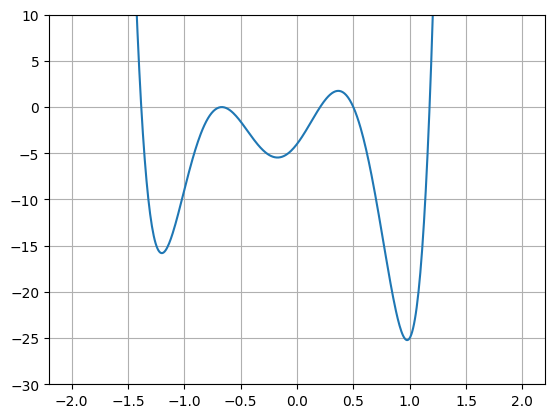

In [47]:
import matplotlib.pyplot as plt

f = lambda x: 54*x**6+45*x**5-102*x**4-69*x**3+35*x**2+16*x-4
X = np.linspace(-2, 2, 500)
plt.plot(X, f(X))
plt.ylim(-30, 10)
axes = plt.gca()
axes.grid()
plt.show()

In [48]:
SecantLine(f, -1.5, -1.4)   # 超线性
SecantLine(f, -1.0, -0.5)   # 线性
SecantLine(f, 0, 0.4)       # 超线性
SecantLine(f, 0.4, 0.6)     # 超线性
SecantLine(f, 1.0, 1.25)    # 超线性

Iter of  1, newPoint: -1.3882641030092477.
Iter of  2, newPoint: -1.3818282512324171.
Iter of  3, newPoint: -1.3813142180638809.
Iter of  4, newPoint: -1.3812985182666173.
Iter of  5, newPoint: -1.3812984820464749.
SecantLine method iterated of 5 times, with result: -1.381298
    Backward Error (BE):  5.220925913818064e-10

Iter of  1, newPoint: -0.3949579831932773.
Iter of  2, newPoint: -0.5934921837823462.
Iter of  3, newPoint: -0.6170568725221419.
Iter of  4, newPoint: -0.6383928487344351.
Iter of  5, newPoint: -0.6490954620958846.
Iter of  6, newPoint: -0.655978595935283.
Iter of  7, newPoint: -0.6600748269510625.
Iter of  8, newPoint: -0.6626092432987112.
Iter of  9, newPoint: -0.6641625489814171.
Iter of 10, newPoint: -0.665121000199729.
Iter of 11, newPoint: -0.6657119865267488.
Iter of 12, newPoint: -0.6660769034924361.
Iter of 13, newPoint: -0.6663022642532773.
Iter of 14, newPoint: -0.6664414903789521.
Iter of 15, newPoint: -0.6665275136380171.
Iter of 16, newPoint: -0.666580

5. 搞不明白这道题的意义，TODO

6. 没有fzero，TODO